In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as path_effects


file_path = r"E:\Projects\Gamezone Orders Data\Data\Cleaned\gamezone_orders_data_cleaned.csv"
df = pd.read_csv(
    file_path,
    parse_dates=['purchase_ts_cleaned', 'ship_ts'],
    dtype={
        'purchase_year': 'Int64',
        'purchase_month': 'Int64',
        'time_to_ship': 'Int64',
        'revenue': 'float'
    },
    encoding='utf-8',
    keep_default_na=False,
    na_values=['']  # Only treat empty strings as NaN
)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21864 entries, 0 to 21863
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   user_id                          21864 non-null  object        
 1   order_id                         21864 non-null  object        
 2   purchase_ts                      21864 non-null  object        
 3   purchase_ts_cleaned              21863 non-null  datetime64[ns]
 4   purchase_year                    21864 non-null  Int64         
 5   purchase_month                   21864 non-null  Int64         
 6   time_to_ship                     21864 non-null  Int64         
 7   ship_ts                          21864 non-null  datetime64[ns]
 8   product_name                     21864 non-null  object        
 9   product_name_cleaned             21864 non-null  object        
 10  product_id                       21864 non-null  object   

In [3]:
# Sample data
data = {
    'marketing_channel_cleaned': ['affiliate', 'direct', 'email', 'social media', 'unknown'],
    'total_revenue': [222428.31, 5209858.66, 611182.72, 69526.37, 38270.43],
    'total_orders': [714, 17315, 3239, 320, 129],
    'unique_customers': [648, 15794, 2985, 304, 120]
}

df_summary = pd.DataFrame(data)

# Calculated metrics
df_summary['RPAC'] = df_summary['total_revenue'] / df_summary['unique_customers']  # Revenue per customer
df_summary['Orders_per_Customer'] = df_summary['total_orders'] / df_summary['unique_customers']  # Orders per customer
df_summary['AOV'] = df_summary['total_revenue'] / df_summary['total_orders']  # Average Order Value

df_summary



,marketing_channel_cleaned,total_revenue,total_orders,unique_customers,RPAC,Orders_per_Customer,AOV
0,affiliate,222428.31,714,648,343.253565,1.101852,311.524244
1,direct,5209858.66,17315,15794,329.863154,1.096302,300.887015
2,email,611182.72,3239,2985,204.751330,1.085092,188.694881
3,social media,69526.37,320,304,228.705164,1.052632,217.269906
4,unknown,38270.43,129,120,318.920250,1.075000,296.670000


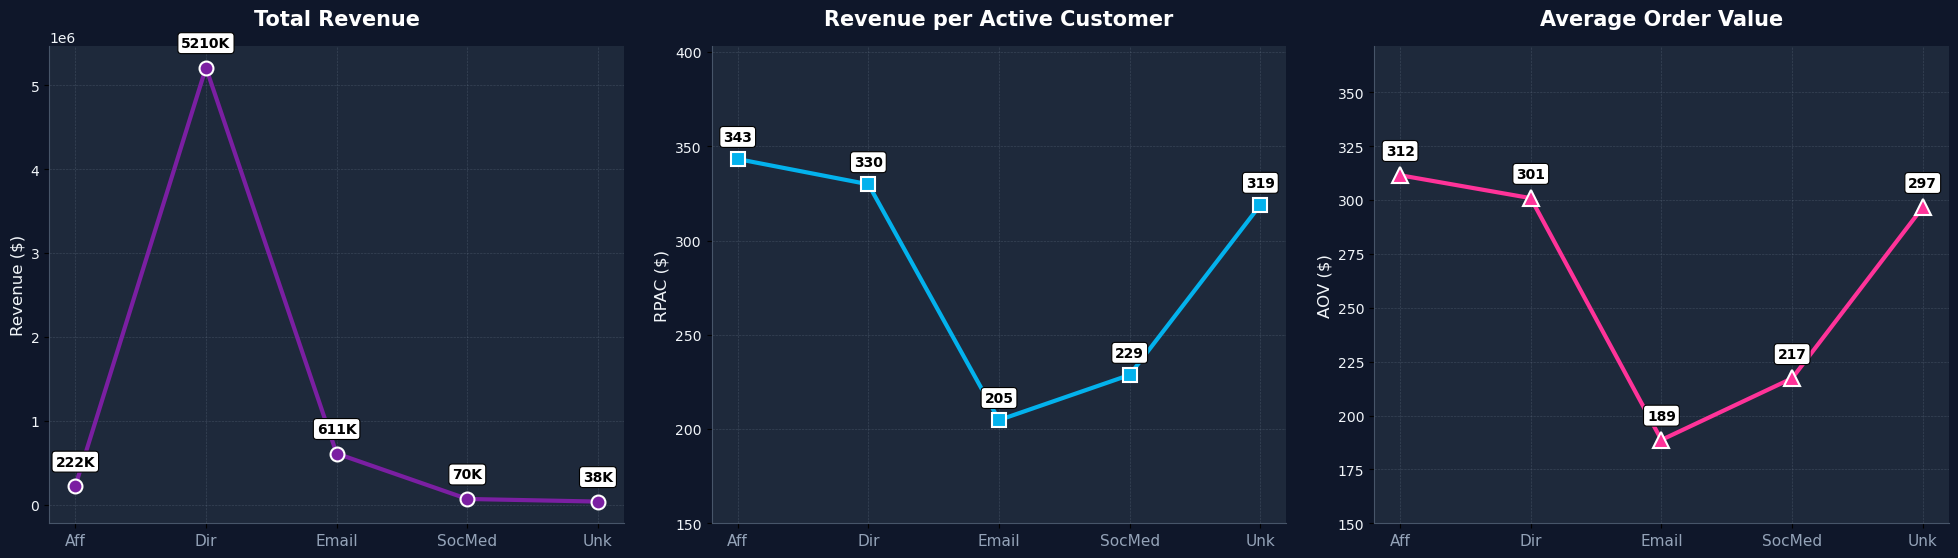

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# ===============================
# Data
# ===============================
df_summary = pd.DataFrame({
    'marketing_channel_cleaned': ['affiliate', 'direct', 'email', 'social media', 'unknown'],
    'total_revenue': [222428.31, 5209858.66, 611182.72, 69526.37, 38270.43],
    'RPAC': [343.25, 329.86, 204.75, 228.71, 318.92],
    'AOV': [311.52, 300.89, 188.69, 217.27, 296.67]
})

# Abbreviated x-axis labels
label_map = {
    "affiliate": "Aff",
    "direct": "Dir",
    "email": "Email",
    "social media": "SocMed",
    "unknown": "Unk"
}
labels = df_summary['marketing_channel_cleaned'].map(label_map)

# Brand Colors
COLOR_REV = "#7B1FA2"
COLOR_RPAC = "#03b2ed"
COLOR_AOV = "#FF3399"

# ==========================================
#    FIGURE + SUBPLOT CREATION
# ==========================================
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.patch.set_facecolor("#0f172a")   # very dark slate blue

# APPLY PLOT BACKGROUND + STYLING
for ax in axes:
    ax.set_facecolor("#1e293b")  # plot area dark slate
    ax.grid(True, linestyle='--', linewidth=0.45, alpha=0.25, color="#94a3b8")
    
    # Spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color("#475569")
    ax.spines['bottom'].set_color("#475569")  # subtle bottom border
    
    ax.tick_params(axis='y', labelcolor="#f1f5f9", labelsize=10)
    ax.tick_params(axis='x', labelcolor="#94a3b8", labelsize=10)

# Helper function → White box with black text
def label_box(ax, x, y, text):
    ax.text(
        x, y,
        text,
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold",
        color="black",
        bbox=dict(
            facecolor="white",
            edgecolor="black",
            boxstyle="round,pad=0.25",
            linewidth=0.8
        )
    )

# ==========================================
#   1️⃣ TOTAL REVENUE
# ==========================================
axes[0].plot(
    labels, df_summary['total_revenue'],
    marker='o', markersize=10,
    linewidth=3, color=COLOR_REV,
    markeredgewidth=1.5, markeredgecolor="#ffffff"
)
axes[0].set_title("Total Revenue", fontsize=15, fontweight="bold", color="#ffffff", pad=15)
axes[0].set_ylabel("Revenue ($)", fontsize=12, color="#f1f5f9")

for i, v in enumerate(df_summary['total_revenue']):
    label_box(axes[0], i, v + max(df_summary['total_revenue']) * 0.04, f"{v/1000:.0f}K")

# ==========================================
#   2️⃣ RPAC
# ==========================================
axes[1].plot(
    labels, df_summary['RPAC'],
    marker='s', markersize=10,
    linewidth=3, color=COLOR_RPAC,
    markeredgewidth=1.5, markeredgecolor="#ffffff"
)
axes[1].set_title("Revenue per Active Customer", fontsize=15, fontweight="bold", color="#ffffff", pad=15)
axes[1].set_ylabel("RPAC ($)", fontsize=12, color="#f1f5f9")
axes[1].set_ylim(150, max(df_summary['RPAC']) + 60)

for i, v in enumerate(df_summary['RPAC']):
    label_box(axes[1], i, v + 8, f"{v:.0f}")

# ==========================================
#   3️⃣ AOV
# ==========================================
axes[2].plot(
    labels, df_summary['AOV'],
    marker='^', markersize=11,
    linewidth=3, color=COLOR_AOV,
    markeredgewidth=1.5, markeredgecolor="#ffffff"
)
axes[2].set_title("Average Order Value", fontsize=15, fontweight="bold", color="#ffffff", pad=15)
axes[2].set_ylabel("AOV ($)", fontsize=12, color="#f1f5f9")
axes[2].set_ylim(150, max(df_summary['AOV']) + 60)

for i, v in enumerate(df_summary['AOV']):
    label_box(axes[2], i, v + 8, f"{v:.0f}")

# ===============================
# X-Axis styling
# ===============================
for ax in axes:
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=0, ha='center', fontsize=11)

plt.tight_layout(pad=2.2)
plt.show()
